In [34]:
from datetime import date
date.today()

datetime.date(2020, 5, 9)

In [35]:
%pylab inline --no-import-all
from scipy.stats import norm #will use this for plotting

Populating the interactive namespace from numpy and matplotlib


In [36]:
#import all our distributions
import distributions

In [37]:
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]
#print out their names
all_distributions_dict.keys()

dict_keys(['Dist_cmr653', 'Dist_rdm445', 'Dist_speedreed', 'Dist_ltw244', 'Dist_bt1369', 'Dist_kc90', 'Dist_rmr557', 'Dist_jam1535', 'Dist_at4227', 'Dist_os852', 'Dist_ia1113', 'Dist_knd286', 'Dist_aew492', 'Dist_cah736', 'Dist_phh250', 'Dist_ks938', 'Dist_sk7372', 'Dist_kc90_4', 'Dist_sj2879', 'Dist_dmc731', 'Dist_sdl433', 'Dist_pbg240', 'Dist_pw1091', 'Dist_lac683', 'Dist_ajt540', 'Dist_sm6779', 'Dist_mkb452', 'Dist_npl248', 'Dist_speedreed2', 'Dist_emm815', 'Dist_yx1796', 'Dist_abw400', 'Dist_sea438', 'Dist_sb6187', 'Dist_ejt352', 'Dist_tt1392', 'Dist_jdg577'])

In [38]:
len(all_distributions_dict.keys())

37

In [39]:
## Do tests
ok_distributions_list=[]
problems=[]
for i, cls in enumerate(all_distributions_list):
    #print(cls)
    try:
        dist = cls()
        N_test = 10000
        #print('will try to generate for %s' %(cls.__name__))
        if dist.pdf(dist.x_min + .3*(dist.x_max-dist.x_min)) < 1E-3:
            print("may have a problem")
            continue
            
        rvs = dist.rvs(N_test)
        if np.abs(np.mean(rvs) - dist.mean()) > 5*np.std(rvs)/np.sqrt(N_test):
            print("means don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.mean(rvs), dist.mean()))
            continue
            
        elif np.abs(np.std(rvs) - dist.std()) > 5*np.std(rvs)/np.sqrt(np.sqrt(1.*N_test)):
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        elif np.abs(np.std(rvs) - dist.std()) / dist.std() > 0.1:
            print("std devs. don't match for %s: %f vs. %f" %(cls.__name__, 
                                                          np.std(rvs), dist.std()))
            continue
        
        elif np.sum(dist.pdf(np.linspace(dist.x_min,dist.x_max,100))<0) > 0:
            print("pdf was negative in some places")
            continue                    

        else:
            print("%s passes tests, adding it" %(cls.__name__))
            ok_distributions_list.append(cls)
    except:
        print("%s has errors, does't work" %(cls.__name__))
        continue

print("list of ok distributions:",[i.__name__ for i in ok_distributions_list])

Dist_cmr653 passes tests, adding it
Dist_rdm445 passes tests, adding it
Dist_speedreed passes tests, adding it
Dist_ltw244 passes tests, adding it
Dist_bt1369 passes tests, adding it
Dist_kc90 passes tests, adding it
Dist_rmr557 passes tests, adding it
Dist_jam1535 has errors, does't work
Dist_at4227 passes tests, adding it
Dist_os852 passes tests, adding it
Dist_ia1113 passes tests, adding it
Dist_knd286 passes tests, adding it
Dist_aew492 passes tests, adding it


C:\Users\sjams\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


Dist_cah736 passes tests, adding it
Dist_phh250 passes tests, adding it
Dist_ks938 passes tests, adding it
Dist_sk7372 passes tests, adding it
Dist_kc90_4 passes tests, adding it
Dist_sj2879 passes tests, adding it
Dist_dmc731 passes tests, adding it
Dist_sdl433 passes tests, adding it
means don't match for Dist_pbg240: 2.397915 vs. 3.200000
Dist_pw1091 passes tests, adding it
Dist_lac683 passes tests, adding it
Dist_ajt540 passes tests, adding it
Dist_sm6779 passes tests, adding it
means don't match for Dist_mkb452: 2.069969 vs. 2.066190
Dist_npl248 passes tests, adding it
Dist_speedreed2 passes tests, adding it
Dist_emm815 passes tests, adding it
Dist_yx1796 passes tests, adding it
Dist_abw400 passes tests, adding it
Dist_sea438 passes tests, adding it
Dist_sb6187 passes tests, adding it
Dist_ejt352 passes tests, adding it
Dist_tt1392 passes tests, adding it
Dist_jdg577 passes tests, adding it
list of ok distributions: ['Dist_cmr653', 'Dist_rdm445', 'Dist_speedreed', 'Dist_ltw244', '

In [40]:
problems = [x for x in all_distributions_list if x not in ok_distributions_list]
[i.__name__ for i in problems]

['Dist_jam1535', 'Dist_pbg240', 'Dist_mkb452']

In [41]:
# how many samples for plots?
n_samples = 100000

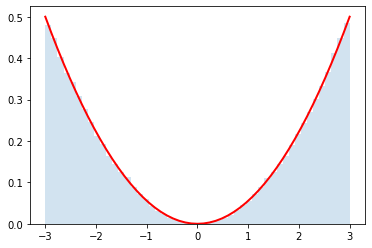

In [42]:
# Here's an example of usage
dist = distributions.Dist_sj2879()
rvs = dist.rvs(n_samples)
counts, bins, edges = plt.hist(rvs, bins=50, density=True, alpha =0.2)
y = []
for bin in bins:
    y.append(dist.pdf(bin))
plt.plot(bins, y, c='r', lw=2)

In [43]:
dist.std()

2.32379000772445

Dist_cmr653: std from samples = 1.25, std from dist = 1.25
Dist_rdm445: std from samples = 0.71, std from dist = 0.71
Dist_speedreed: std from samples = 1.42, std from dist = 1.41
Dist_ltw244: std from samples = 0.58, std from dist = 0.58
Dist_bt1369: std from samples = 1.57, std from dist = 1.57
Dist_kc90: std from samples = 0.71, std from dist = 0.71
Dist_rmr557: std from samples = 0.61, std from dist = 0.61
Dist_at4227: std from samples = 0.68, std from dist = 0.68
Dist_os852: std from samples = 0.66, std from dist = 0.65
Dist_ia1113: std from samples = 0.14, std from dist = 0.14
Dist_knd286: std from samples = 0.31, std from dist = 0.31
Dist_aew492: std from samples = 0.39, std from dist = 0.39
Dist_cah736: std from samples = 1.50, std from dist = 1.50
Dist_phh250: std from samples = 0.24, std from dist = 0.24
Dist_ks938: std from samples = 0.71, std from dist = 0.71
Dist_sk7372: std from samples = 0.77, std from dist = 0.77
Dist_kc90_4: std from samples = 0.71, std from dist = 0.7

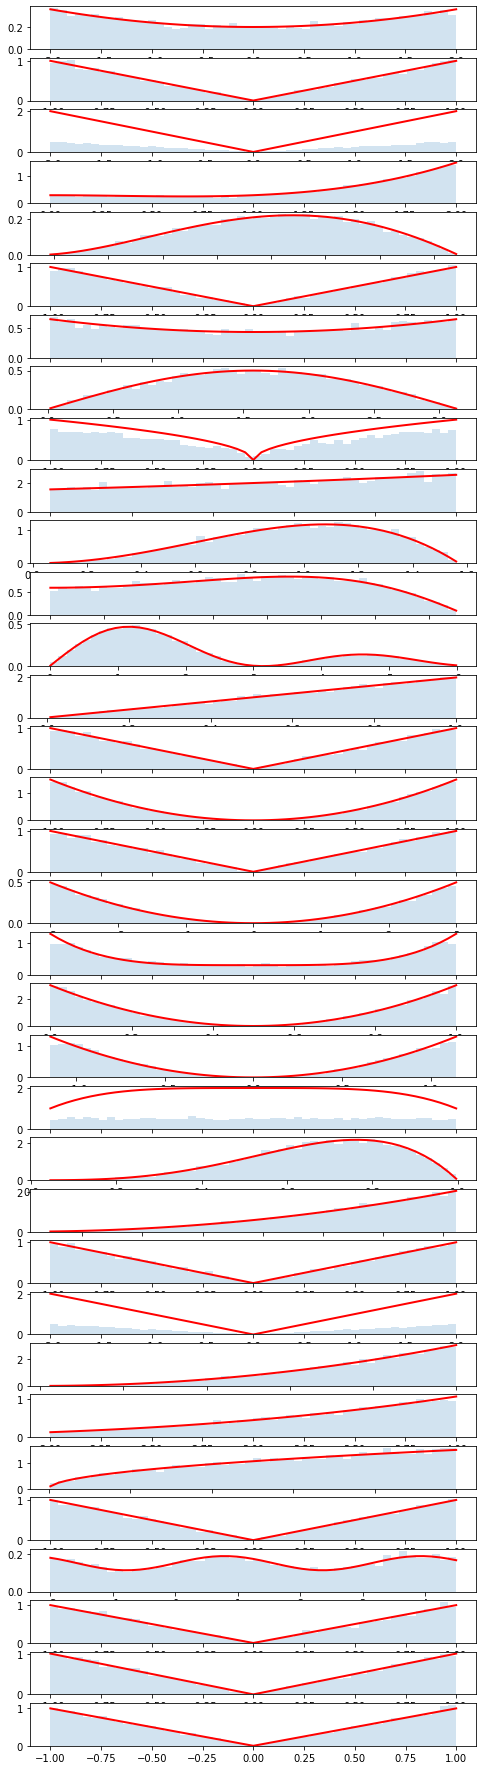

In [44]:
fig = plt.figure(figsize=2*plt.figaspect(len(ok_distributions_list)))
for i, cls in enumerate(ok_distributions_list):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

Dist_jam1535: std from samples = 0.84, std from dist = 0.84
Dist_pbg240: std from samples = 1.05, std from dist = 9.26
looks like a problem with this distribution:  <class 'distributions.Dist_pbg240.Dist_pbg240'>
Dist_mkb452: std from samples = 0.06, std from dist = 0.06


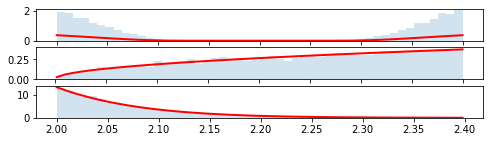

In [58]:
fig = plt.figure(figsize=2*plt.figaspect(len(problems)))
for i, cls in enumerate(problems):
    dist = cls()
    rvs = dist.rvs(10000)
    ax = fig.add_subplot(len(ok_distributions_list),1,i+1)
    counts, bins, patches = ax.hist(rvs, bins=50, density=True, alpha=0.2)
    # depending on how you code up your pdf() function, numpy might not
    # be able to "broadcast" (apply the function for each element of a numpy array)
    # but this should always wrok
    y = []
    for bin in bins:
        y.append(dist.pdf(bin))
        
    # ok, now plot it
    plt.plot(bins, y, c='r', lw=2)
    
    # and let's check if the distribution is ok
    print("%s: std from samples = %.2f, std from dist = %.2f" %(cls.__name__,np.std(dist.rvs(n_samples)), dist.std()))
    if np.abs(np.std(dist.rvs(n_samples)) - dist.std()) / dist.std() > 0.1:
        print("looks like a problem with this distribution: ", cls)

In [59]:
def do_convolution(dist, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for i in range(N):
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

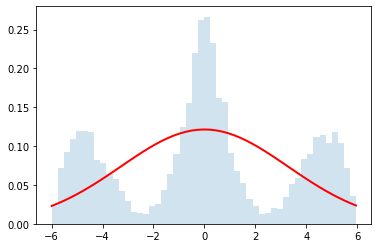

In [60]:
dist = distributions.Dist_sj2879()  #update me!
do_convolution(dist,2)

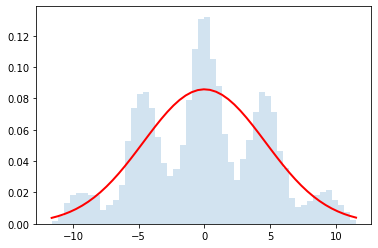

In [61]:
do_convolution(dist,4)

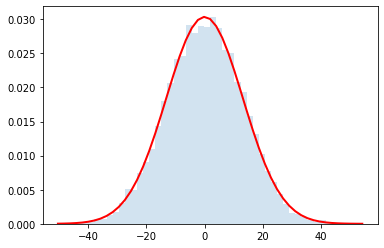

In [62]:
do_convolution(dist,32)

In [63]:
np.random.choice(['a','b','c','d'], 10)

array(['a', 'b', 'a', 'b', 'c', 'a', 'a', 'c', 'd', 'c'], dtype='<U1')

In [64]:
def do_random_convolution(list_of_distributions, N):
    n_samples = 10000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        print(dist_class.__name__, dist.std())
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

Dist_ks938 0.7071067811865476
Dist_sb6187 1.902


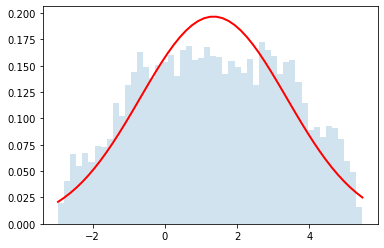

In [65]:
do_random_convolution(ok_distributions_list,2)

Dist_sea438 0.7071067811865476
Dist_cmr653 1.248156535392138
Dist_bt1369 1.56953460038
Dist_ejt352 0.7071067811865476


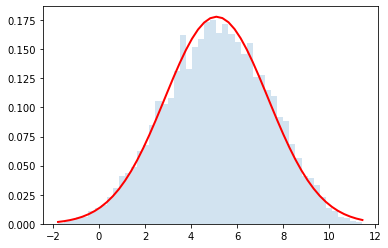

In [66]:
do_random_convolution(ok_distributions_list,4)

Dist_os852 0.6545248448388085
Dist_sdl433 0.3872983346207417
Dist_rmr557 0.609449400220044
Dist_ks938 0.7071067811865476


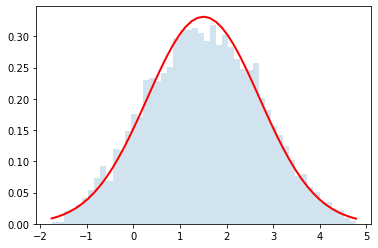

In [67]:
do_random_convolution(ok_distributions_list,4)

Dist_kc90_4 0.7071067811865476
Dist_yx1796 0.5157518783291051
Dist_abw400 0.26186146828319085
Dist_emm815 0.19364916731037085
Dist_speedreed2 1.4142135623730951
Dist_aew492 0.3878
Dist_sb6187 1.902
Dist_kc90_4 0.7071067811865476
Dist_sk7372 0.7745966692414834
Dist_sdl433 0.3872983346207417
Dist_sdl433 0.3872983346207417
Dist_sb6187 1.902
Dist_speedreed 1.4142135623730951
Dist_ia1113 0.14344336861632886
Dist_emm815 0.19364916731037085
Dist_speedreed2 1.4142135623730951
Dist_yx1796 0.5157518783291051
Dist_ajt540 0.17339222485840364
Dist_emm815 0.19364916731037085
Dist_sb6187 1.902
Dist_aew492 0.3878
Dist_os852 0.6545248448388085
Dist_sb6187 1.902
Dist_speedreed 1.4142135623730951
Dist_ltw244 0.581033561853
Dist_kc90 0.7071067811865476
Dist_sm6779 0.27929
Dist_rmr557 0.609449400220044
Dist_kc90_4 0.7071067811865476
Dist_sdl433 0.3872983346207417
Dist_sb6187 1.902
Dist_at4227 0.683667


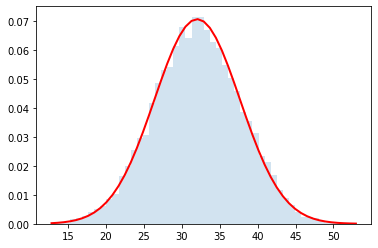

In [68]:
do_random_convolution(ok_distributions_list,32)

In [69]:
def do_random_convolution_with_chi2(list_of_distributions, N):
    n_samples = 100000
    q = np.zeros(n_samples)
    var_q = 0.
    mean_q = 0.

    for dist_class in np.random.choice(list_of_distributions,N):
        dist = dist_class()
        q = q+dist.rvs(n_samples)
        var_q = var_q + dist.std()**2
        mean_q = mean_q + dist.mean()

    std_q = np.sqrt( var_q )


    counts, bins, patches = plt.hist(q,bins=50, density=True, alpha=.2)
    plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')

In [70]:
#make sure to execute this at the end
date.today()

datetime.date(2020, 5, 9)